# Insurance

## HDFCLIFE

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import yfinance as yf

#### Loading Desired Data from Yahoo Finance.

In [2]:
hdfc = yf.download('HDFCLIFE.NS', start="2019-01-01", end="2023-12-30")
hdfc.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-01-01,387.799988,388.899994,385.100006,386.399994,381.220184,244225
2019-01-02,385.950012,392.500000,385.100006,391.149994,385.906464,401487
2019-01-03,392.649994,395.500000,389.500000,391.299988,386.054443,391423
2019-01-04,392.000000,394.950012,387.750000,393.500000,388.224945,484014
2019-01-07,394.500000,395.399994,390.100006,393.049988,387.780975,346567


#### Cleaning Process.

In [3]:
hdfc.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1235 entries, 2019-01-01 to 2023-12-29
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1235 non-null   float64
 1   High       1235 non-null   float64
 2   Low        1235 non-null   float64
 3   Close      1235 non-null   float64
 4   Adj Close  1235 non-null   float64
 5   Volume     1235 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 67.5 KB


In [4]:
hdfc.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1235.000000,1235.000000,1235.000000,1235.000000,1235.000000,1.235000e+03
mean,580.819353,587.902228,573.282792,580.173239,576.519139,3.695169e+06
std,91.942438,91.590285,91.451722,91.352699,91.209537,4.269056e+06
min,347.399994,349.750000,340.000000,342.299988,339.221466,0.000000e+00
25%,530.000000,536.000000,521.399994,528.350006,525.312744,1.972130e+06
50%,585.299988,591.849976,578.000000,584.700012,580.087341,2.800824e+06
75%,654.200012,660.325012,645.350006,652.875000,650.450012,4.061618e+06
max,759.000000,775.650024,743.500000,759.000000,754.393555,9.476536e+07


In [5]:
hdfc.rename(columns={"Adj Close": "price_t"}, inplace=True)
hdfc.head()

,Open,High,Low,Close,price_t,Volume
Date,,,,,,
2019-01-01,387.799988,388.899994,385.100006,386.399994,381.220184,244225
2019-01-02,385.950012,392.500000,385.100006,391.149994,385.906464,401487
2019-01-03,392.649994,395.500000,389.500000,391.299988,386.054443,391423
2019-01-04,392.000000,394.950012,387.750000,393.500000,388.224945,484014
2019-01-07,394.500000,395.399994,390.100006,393.049988,387.780975,346567


#### Calculate daily returns.

#### The stock return calculation considers both the appreciation of the stock’s price and any dividends that were paid out during the holding period.

In [6]:
hdfc['daily_returns']=hdfc["price_t"].pct_change()
hdfc

,Open,High,Low,Close,price_t,Volume,daily_returns
Date,,,,,,,
2019-01-01,387.799988,388.899994,385.100006,386.399994,381.220184,244225,NaN
2019-01-02,385.950012,392.500000,385.100006,391.149994,385.906464,401487,0.012293
2019-01-03,392.649994,395.500000,389.500000,391.299988,386.054443,391423,0.000383
2019-01-04,392.000000,394.950012,387.750000,393.500000,388.224945,484014,0.005622
2019-01-07,394.500000,395.399994,390.100006,393.049988,387.780975,346567,-0.001144
...,...,...,...,...,...,...,...
2023-12-22,646.000000,649.000000,637.099976,639.849976,639.849976,2854029,-0.006753
2023-12-26,641.000000,645.900024,634.000000,638.000000,638.000000,2202221,-0.002891
2023-12-27,643.000000,646.000000,638.400024,643.799988,643.799988,2353373,0.009091


#### Visualize the trend of stock price.

<Axes: xlabel='Date'>

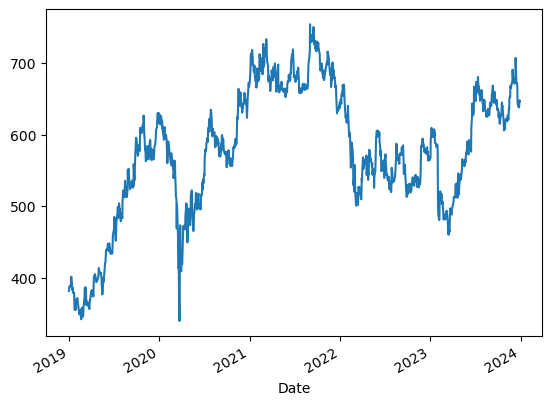

In [7]:
hdfc['price_t'].plot()

#### Visualize the trend of stock daily returns.

<Axes: xlabel='Date'>

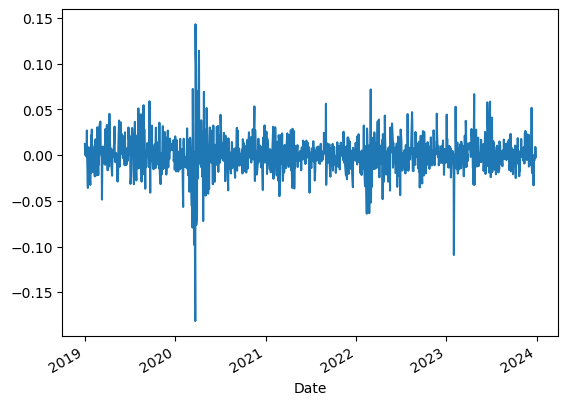

In [8]:
hdfc['daily_returns'].plot()

#### When we compare the trend of stock price and stock returns, we can observe that the stock price of HDFCLIFE is in the Downtrend in early 2020 and later goes Up accordingly the stock returns some how show the same pattern. This means the stock returns are predictable.

#### Moving Average (30-day)

In [9]:
hdfc['mov_avg'] = hdfc['price_t'].rolling(30).mean()

<Axes: xlabel='Date'>

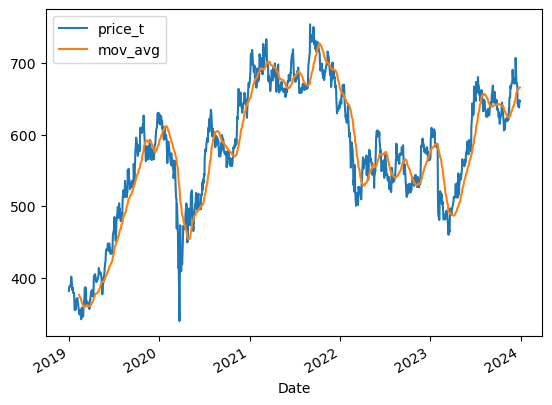

In [10]:
hdfc[['price_t', 'mov_avg']].plot()

#### Volatility Measures (30-day)

In [11]:
hdfc['Log_Ret'] = np.log(hdfc['price_t'] / hdfc['price_t'].shift(1))
# Compute Volatility using the pandas rolling standard deviation function
hdfc['volatility'] = hdfc['Log_Ret'].rolling(window=30).std() * np.sqrt(30)

<Axes: xlabel='Date'>

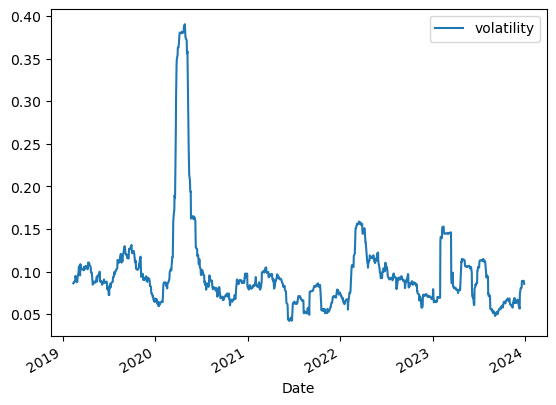

In [12]:
hdfc[['volatility']].plot()

#### RSI (30-day)

In [13]:
change = hdfc["price_t"].diff()
change.dropna(inplace=True)

In [14]:
# Create two copies of the Closing price Series
change_up = change.copy()
change_down = change.copy()


change_up[change_up<0] = 0
change_down[change_down>0] = 0

# Verify that we did not make any mistakes
change.equals(change_up+change_down)

# Calculate the rolling average of average up and average down
avg_up = change_up.rolling(30).mean()
avg_down = change_down.rolling(30).mean().abs()

rsi = 100 * avg_up / (avg_up + avg_down)

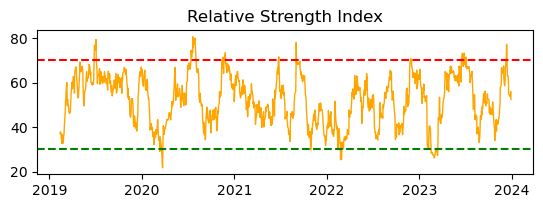

In [15]:
# Create chart on the same figure.
ax = plt.subplot2grid((10,1), (5,0), rowspan = 4, colspan = 1)

# Plot the RSI
ax.set_title('Relative Strength Index')
ax.plot(rsi, color='orange', linewidth=1)

# Add two horizontal lines, signalling the buy and sell ranges.
# Oversold
ax.axhline(30, linestyle='--', linewidth=1.5, color='green')
# Overbought
ax.axhline(70, linestyle='--', linewidth=1.5, color='red')

## ICICIGI

#### Loading Desired Data from Yahoo Finance.

In [16]:
icicigi = yf.download('ICICIGI.NS', start="2019-01-01", end="2023-12-30")
icicigi.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-01-01,854.000000,878.950012,854.0,873.250000,847.304260,100438
2019-01-02,870.000000,884.500000,860.0,875.450012,849.438721,170450
2019-01-03,875.000000,884.000000,860.0,868.200012,842.404114,124566
2019-01-04,862.099976,874.000000,850.5,866.900024,841.142761,234451
2019-01-07,868.000000,886.950012,860.0,865.450012,839.735901,116260


#### Cleaning Process.

In [17]:
icicigi.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1235 entries, 2019-01-01 to 2023-12-29
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1235 non-null   float64
 1   High       1235 non-null   float64
 2   Low        1235 non-null   float64
 3   Close      1235 non-null   float64
 4   Adj Close  1235 non-null   float64
 5   Volume     1235 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 67.5 KB


In [18]:
icicigi.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1235.000000,1235.000000,1235.000000,1235.000000,1235.000000,1.235000e+03
mean,1282.357368,1300.834654,1263.069962,1281.126112,1257.968767,7.125032e+05
std,164.758433,164.416409,163.748994,163.295464,161.694024,1.503406e+06
min,817.849976,845.000000,805.000000,817.849976,793.550049,0.000000e+00
25%,1162.450012,1182.950012,1140.150024,1160.799988,1139.534485,3.505745e+05
50%,1284.000000,1301.000000,1265.050049,1283.099976,1259.138916,5.094450e+05
75%,1395.000000,1414.275024,1374.000000,1392.775024,1375.575439,7.494815e+05
max,1645.349976,1675.000000,1618.000000,1638.050049,1607.099731,2.900629e+07


In [19]:
icicigi.rename(columns={"Adj Close": "price_t"}, inplace=True)
icicigi.head()

,Open,High,Low,Close,price_t,Volume
Date,,,,,,
2019-01-01,854.000000,878.950012,854.0,873.250000,847.304260,100438
2019-01-02,870.000000,884.500000,860.0,875.450012,849.438721,170450
2019-01-03,875.000000,884.000000,860.0,868.200012,842.404114,124566
2019-01-04,862.099976,874.000000,850.5,866.900024,841.142761,234451
2019-01-07,868.000000,886.950012,860.0,865.450012,839.735901,116260


#### Calculate daily returns.

#### The stock return calculation considers both the appreciation of the stock’s price and any dividends that were paid out during the holding period.

In [20]:
icicigi['daily_returns']=icicigi["price_t"].pct_change()
icicigi

,Open,High,Low,Close,price_t,Volume,daily_returns
Date,,,,,,,
2019-01-01,854.000000,878.950012,854.000000,873.250000,847.304260,100438,NaN
2019-01-02,870.000000,884.500000,860.000000,875.450012,849.438721,170450,0.002519
2019-01-03,875.000000,884.000000,860.000000,868.200012,842.404114,124566,-0.008281
2019-01-04,862.099976,874.000000,850.500000,866.900024,841.142761,234451,-0.001497
2019-01-07,868.000000,886.950012,860.000000,865.450012,839.735901,116260,-0.001673
...,...,...,...,...,...,...,...
2023-12-22,1413.099976,1428.199951,1405.750000,1422.599976,1422.599976,230698,0.011986
2023-12-26,1423.000000,1439.349976,1403.000000,1416.099976,1416.099976,398150,-0.004569
2023-12-27,1419.800049,1432.000000,1410.650024,1415.000000,1415.000000,326744,-0.000777


#### Visualize the trend of stock price.

<Axes: xlabel='Date'>

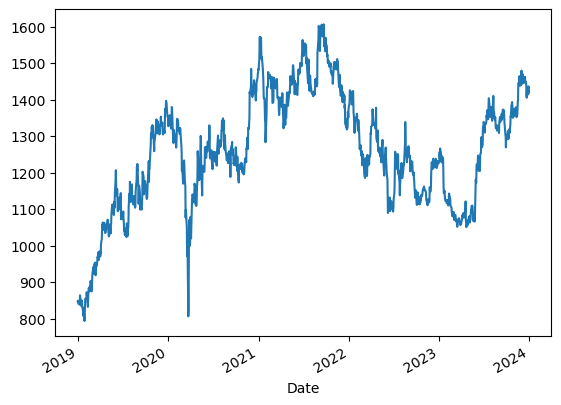

In [21]:
icicigi['price_t'].plot()

#### Visualize the trend of stock daily returns.

<Axes: xlabel='Date'>

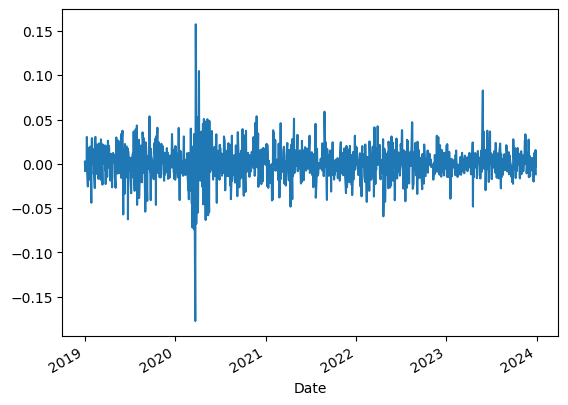

In [22]:
icicigi['daily_returns'].plot()

#### When we compare the trend of stock price and stock returns, we can observe that the stock price of ICICI General Insurance is in the Downtrend in early 2020 and later goes Up accordingly the stock returns show some how same pattern. This means the stock returns are much predictable.

#### Moving Average

In [23]:
icicigi['mov_avg'] = icicigi['price_t'].rolling(30).mean()

<Axes: xlabel='Date'>

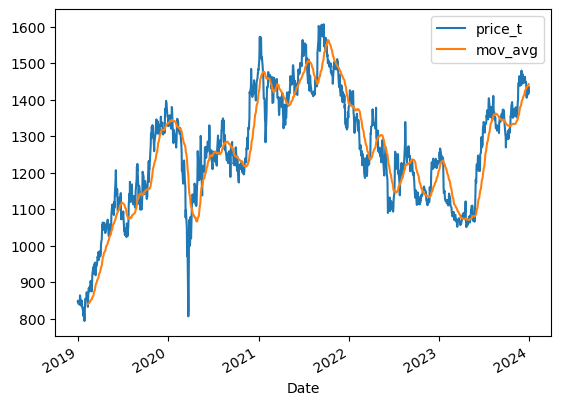

In [24]:
icicigi[['price_t', 'mov_avg']].plot()

#### Volatility Measures (30-day)

In [25]:
icicigi['Log_Ret'] = np.log(icicigi['price_t'] / icicigi['price_t'].shift(1))
# Compute Volatility using the pandas rolling standard deviation function
icicigi['volatility'] = icicigi['Log_Ret'].rolling(window=30).std() * np.sqrt(30)

<Axes: xlabel='Date'>

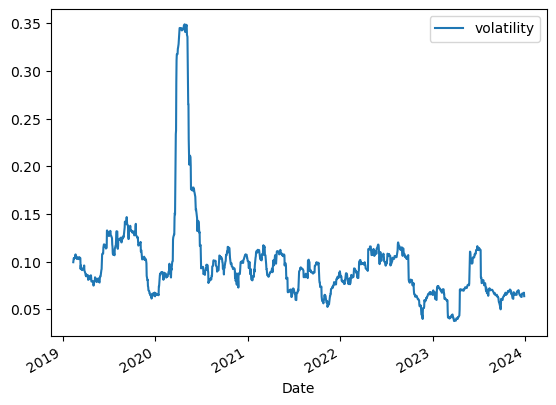

In [26]:
icicigi[['volatility']].plot()

#### RSI (30-day)

In [27]:
change = icicigi["price_t"].diff()
change.dropna(inplace=True)

In [28]:
# Create two copies of the Closing price Series
change_up = change.copy()
change_down = change.copy()


change_up[change_up<0] = 0
change_down[change_down>0] = 0

# Verify that we did not make any mistakes
change.equals(change_up+change_down)

# Calculate the rolling average of average up and average down
avg_up = change_up.rolling(30).mean()
avg_down = change_down.rolling(30).mean().abs()

rsi = 100 * avg_up / (avg_up + avg_down)

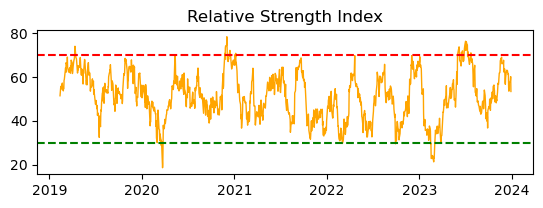

In [29]:
# Create chart on the same figure.
ax = plt.subplot2grid((10,1), (5,0), rowspan = 4, colspan = 1)

# Plot the RSI
ax.set_title('Relative Strength Index')
ax.plot(rsi, color='orange', linewidth=1)

# Add two horizontal lines, signalling the buy and sell ranges.
# Oversold
ax.axhline(30, linestyle='--', linewidth=1.5, color='green')
# Overbought
ax.axhline(70, linestyle='--', linewidth=1.5, color='red')

## ICICIPRULI

#### Loading Desired Data from Yahoo Finance.

In [30]:
icicip = yf.download('ICICIPRULI.NS', start="2019-01-01", end="2023-12-30")
icicip.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-01-01,324.500000,327.200012,322.200012,325.899994,322.303589,360248
2019-01-02,323.700012,327.000000,318.100006,319.799988,316.270844,409481
2019-01-03,318.049988,320.850006,315.450012,316.250000,312.760071,580055
2019-01-04,316.950012,326.299988,316.049988,324.700012,321.116821,1026786
2019-01-07,326.149994,328.549988,319.000000,319.950012,316.419281,1088274


#### Cleaning Process.

In [31]:
icicip.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1235 entries, 2019-01-01 to 2023-12-29
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1235 non-null   float64
 1   High       1235 non-null   float64
 2   Low        1235 non-null   float64
 3   Close      1235 non-null   float64
 4   Adj Close  1235 non-null   float64
 5   Volume     1235 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 67.5 KB


In [32]:
icicip.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1235.000000,1235.000000,1235.000000,1235.000000,1235.000000,1.235000e+03
mean,484.847895,492.221215,477.490648,484.538057,482.807325,2.157879e+06
std,88.319553,88.416756,87.896052,88.027405,88.639771,2.168525e+06
min,247.000000,262.649994,226.100006,238.800003,237.498749,0.000000e+00
25%,423.949997,431.675003,418.574997,423.649994,421.383575,1.086917e+06
50%,485.799988,491.950012,478.399994,485.200012,482.964203,1.607478e+06
75%,547.174988,555.299988,539.825012,545.449982,544.575012,2.560398e+06
max,716.450012,724.299988,703.650024,717.150024,715.678101,3.824500e+07


In [33]:
icicip.rename(columns={"Adj Close": "price_t"}, inplace=True)
icicip.head()

,Open,High,Low,Close,price_t,Volume
Date,,,,,,
2019-01-01,324.500000,327.200012,322.200012,325.899994,322.303589,360248
2019-01-02,323.700012,327.000000,318.100006,319.799988,316.270844,409481
2019-01-03,318.049988,320.850006,315.450012,316.250000,312.760071,580055
2019-01-04,316.950012,326.299988,316.049988,324.700012,321.116821,1026786
2019-01-07,326.149994,328.549988,319.000000,319.950012,316.419281,1088274


#### Calculate daily returns.

#### The stock return calculation considers both the appreciation of the stock’s price and any dividends that were paid out during the holding period.

In [34]:
icicip['daily_returns']=icicip["price_t"].pct_change()
icicip

,Open,High,Low,Close,price_t,Volume,daily_returns
Date,,,,,,,
2019-01-01,324.500000,327.200012,322.200012,325.899994,322.303589,360248,NaN
2019-01-02,323.700012,327.000000,318.100006,319.799988,316.270844,409481,-0.018718
2019-01-03,318.049988,320.850006,315.450012,316.250000,312.760071,580055,-0.011101
2019-01-04,316.950012,326.299988,316.049988,324.700012,321.116821,1026786,0.026719
2019-01-07,326.149994,328.549988,319.000000,319.950012,316.419281,1088274,-0.014629
...,...,...,...,...,...,...,...
2023-12-22,521.950012,523.950012,515.000000,518.950012,518.950012,1417103,0.000000
2023-12-26,524.000000,524.500000,516.950012,523.900024,523.900024,2194932,0.009539
2023-12-27,525.000000,529.549988,523.549988,526.599976,526.599976,1839214,0.005154


#### Visualize the trend of stock price.

<Axes: xlabel='Date'>

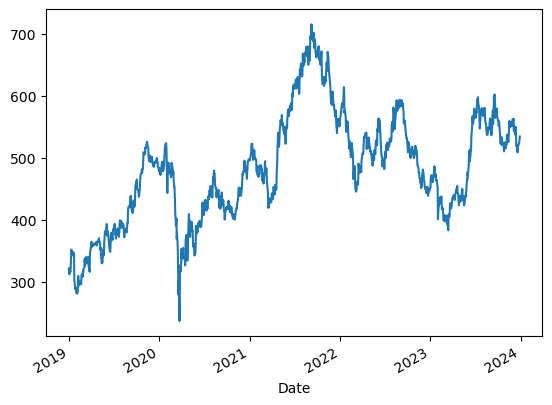

In [35]:
icicip['price_t'].plot()

#### Visualize the trend of stock daily returns.

<Axes: xlabel='Date'>

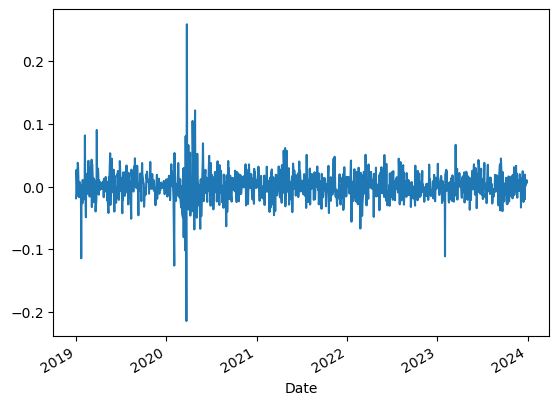

In [36]:
icicip['daily_returns'].plot()

#### When we compare the trend of stock price and stock returns, we can observe that the stock price of ICICI Prudential is in the Downtrend in 2020 and goes Up later accordingly the stock returns show same pattern some how. This means sometims the stock returns are predictable.


#### Moving Average

In [37]:
icicip['mov_avg'] = icicip['price_t'].rolling(30).mean()

<Axes: xlabel='Date'>

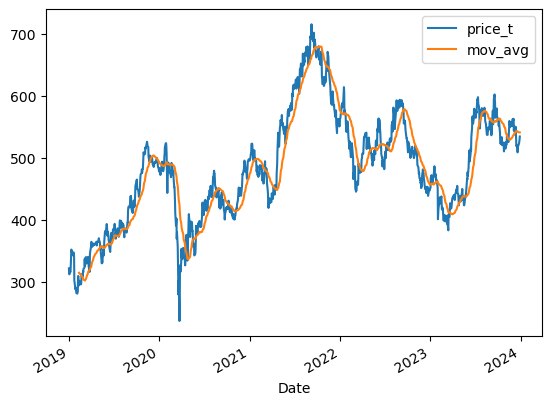

In [38]:
icicip[['price_t', 'mov_avg']].plot()

#### Volatility Measures (30-day)

In [39]:
icicip['Log_Ret'] = np.log(icicip['price_t'] / icicip['price_t'].shift(1))
# Compute Volatility using the pandas rolling standard deviation function
icicip['volatility'] = icicip['Log_Ret'].rolling(window=30).std() * np.sqrt(30)

<Axes: xlabel='Date'>

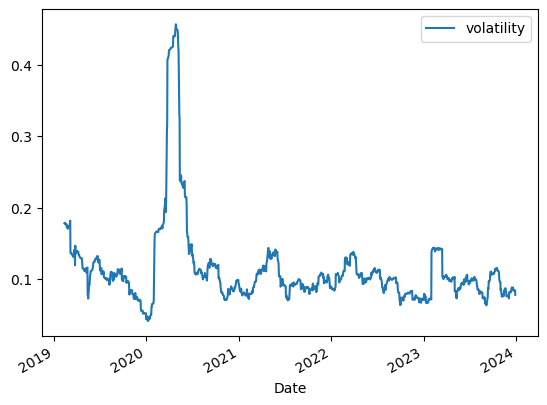

In [40]:
icicip[['volatility']].plot()

#### RSI (30-day)

In [41]:
change = icicip["price_t"].diff()
change.dropna(inplace=True)

In [42]:
# Create two copies of the Closing price Series
change_up = change.copy()
change_down = change.copy()


change_up[change_up<0] = 0
change_down[change_down>0] = 0

# Verify that we did not make any mistakes
change.equals(change_up+change_down)

# Calculate the rolling average of average up and average down
avg_up = change_up.rolling(30).mean()
avg_down = change_down.rolling(30).mean().abs()

rsi = 100 * avg_up / (avg_up + avg_down)

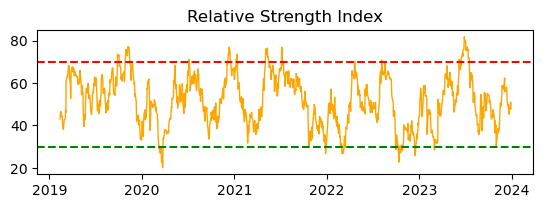

In [43]:
# Create chart on the same figure.
ax = plt.subplot2grid((10,1), (5,0), rowspan = 4, colspan = 1)

# Plot the RSI
ax.set_title('Relative Strength Index')
ax.plot(rsi, color='orange', linewidth=1)

# Add two horizontal lines, signalling the buy and sell ranges.
# Oversold
ax.axhline(30, linestyle='--', linewidth=1.5, color='green')
# Overbought
ax.axhline(70, linestyle='--', linewidth=1.5, color='red')

## LICI

#### Loading Desired Data from Yahoo Finance.

In [44]:
lic = yf.download('LICI.NS', start="2019-01-01", end="2023-12-30")
lic.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-05-17,872.000000,918.950012,860.000000,875.250000,869.138428,48792877
2022-05-18,885.549988,891.000000,874.099976,876.349976,870.230713,8919761
2022-05-19,867.000000,867.000000,838.000000,840.849976,834.978577,7372427
2022-05-20,848.549988,856.799988,825.000000,826.150024,820.381226,7078291
2022-05-23,826.150024,852.700012,803.650024,816.849976,811.146118,12444648


#### Cleaning Process.

In [45]:
lic.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 403 entries, 2022-05-17 to 2023-12-29
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       403 non-null    float64
 1   High       403 non-null    float64
 2   Low        403 non-null    float64
 3   Close      403 non-null    float64
 4   Adj Close  403 non-null    float64
 5   Volume     403 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 22.0 KB


In [46]:
lic.describe()

,Open,High,Low,Close,Adj Close,Volume
count,403.000000,403.000000,403.000000,403.000000,403.000000,4.030000e+02
mean,651.560546,658.511044,645.340444,650.046278,647.527004,2.000985e+06
std,64.969030,67.361460,62.787501,64.510955,64.197367,3.213046e+06
min,534.549988,542.700012,530.049988,531.849976,529.310303,0.000000e+00
25%,608.299988,612.674988,603.750000,606.675018,605.274994,7.344260e+05
50%,645.000000,649.849976,639.200012,643.849976,643.650024,1.103994e+06
75%,681.500000,688.475006,675.000000,678.949982,677.642517,1.948448e+06
max,885.549988,918.950012,874.099976,876.349976,870.230713,4.879288e+07


In [47]:
lic.rename(columns={"Adj Close": "price_t"}, inplace=True)
lic.head()

,Open,High,Low,Close,price_t,Volume
Date,,,,,,
2022-05-17,872.000000,918.950012,860.000000,875.250000,869.138428,48792877
2022-05-18,885.549988,891.000000,874.099976,876.349976,870.230713,8919761
2022-05-19,867.000000,867.000000,838.000000,840.849976,834.978577,7372427
2022-05-20,848.549988,856.799988,825.000000,826.150024,820.381226,7078291
2022-05-23,826.150024,852.700012,803.650024,816.849976,811.146118,12444648


#### Calculate daily returns.

#### The stock return calculation considers both the appreciation of the stock’s price and any dividends that were paid out during the holding period.

In [48]:
lic['daily_returns']=lic["price_t"].pct_change()
lic

,Open,High,Low,Close,price_t,Volume,daily_returns
Date,,,,,,,
2022-05-17,872.000000,918.950012,860.000000,875.250000,869.138428,48792877,NaN
2022-05-18,885.549988,891.000000,874.099976,876.349976,870.230713,8919761,0.001257
2022-05-19,867.000000,867.000000,838.000000,840.849976,834.978577,7372427,-0.040509
2022-05-20,848.549988,856.799988,825.000000,826.150024,820.381226,7078291,-0.017482
2022-05-23,826.150024,852.700012,803.650024,816.849976,811.146118,12444648,-0.011257
...,...,...,...,...,...,...,...
2023-12-22,807.000000,821.000000,788.849976,792.799988,792.799988,10836454,0.037018
2023-12-26,795.000000,798.599976,780.000000,781.299988,781.299988,1907597,-0.014506
2023-12-27,785.000000,825.950012,784.049988,821.400024,821.400024,10656808,0.051325


#### Visualize the trend of stock price.

<Axes: xlabel='Date'>

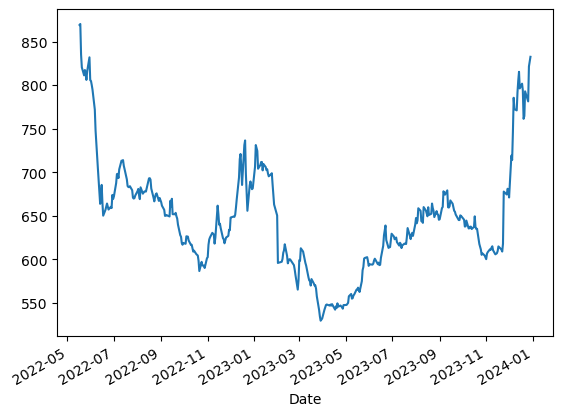

In [49]:
lic['price_t'].plot()

#### Visualize the trend of stock daily returns.

<Axes: xlabel='Date'>

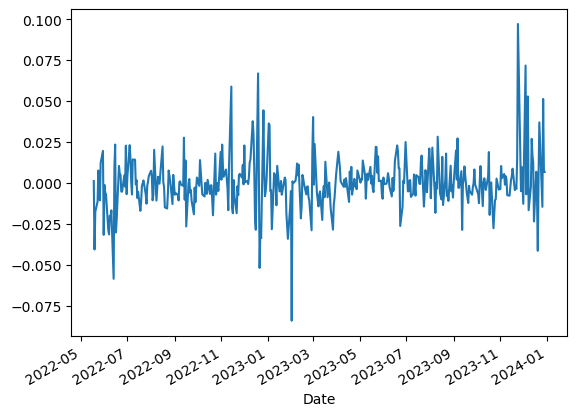

In [50]:
lic['daily_returns'].plot()

#### When we compare the trend of stock price and stock returns, we can observe that the stock price of LIC Insurance is in the Downtrend in mid 2022 and later goes Up in end of 2023 accordingly the stock returns show a same pattern. This means the stock returns are predictable.

#### Moving Average

In [51]:
lic['mov_avg'] = lic['price_t'].rolling(30).mean()

<Axes: xlabel='Date'>

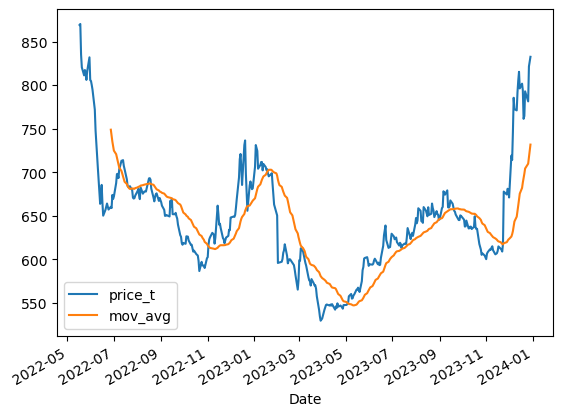

In [52]:
lic[['price_t', 'mov_avg']].plot()

#### Volatility Measures (30-day)

In [53]:
lic['Log_Ret'] = np.log(lic['price_t'] / lic['price_t'].shift(1))
# Compute Volatility using the pandas rolling standard deviation function
lic['volatility'] = lic['Log_Ret'].rolling(window=30).std() * np.sqrt(30)

<Axes: xlabel='Date'>

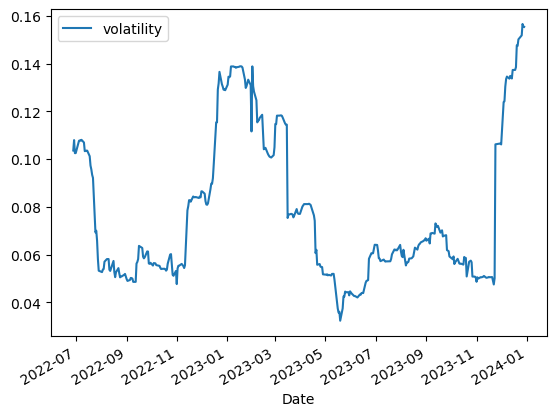

In [54]:
lic[['volatility']].plot()

#### RSI (30-day)

In [55]:
change = lic["price_t"].diff()
change.dropna(inplace=True)

In [56]:
# Create two copies of the Closing price Series
change_up = change.copy()
change_down = change.copy()


change_up[change_up<0] = 0
change_down[change_down>0] = 0

# Verify that we did not make any mistakes
change.equals(change_up+change_down)

# Calculate the rolling average of average up and average down
avg_up = change_up.rolling(30).mean()
avg_down = change_down.rolling(30).mean().abs()

rsi = 100 * avg_up / (avg_up + avg_down)

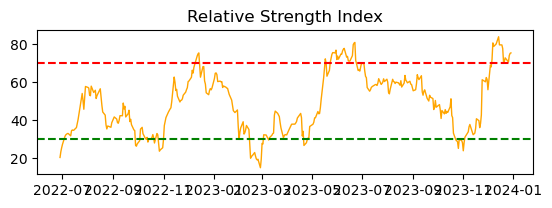

In [57]:
# Create chart on the same figure.
ax = plt.subplot2grid((10,1), (5,0), rowspan = 4, colspan = 1)

# Plot the RSI
ax.set_title('Relative Strength Index')
ax.plot(rsi, color='orange', linewidth=1)

# Add two horizontal lines, signalling the buy and sell ranges.
# Oversold
ax.axhline(30, linestyle='--', linewidth=1.5, color='green')
# Overbought
ax.axhline(70, linestyle='--', linewidth=1.5, color='red')

## SBILIFE

#### Loading Desired Data from Yahoo Finance.

In [58]:
sbi = yf.download('SBILIFE.NS', start="2019-01-01", end="2023-12-30")
sbi.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-01-01,595.250000,601.799988,592.200012,598.849976,592.671570,40902
2019-01-02,593.400024,604.000000,593.400024,601.700012,595.492249,115282
2019-01-03,598.400024,603.000000,590.000000,600.049988,593.859253,415471
2019-01-04,603.000000,615.000000,600.000000,602.849976,596.630371,119061
2019-01-07,602.849976,608.849976,597.700012,602.450012,596.234436,316222


#### Cleaning Process.

In [59]:
sbi.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1235 entries, 2019-01-01 to 2023-12-29
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1235 non-null   float64
 1   High       1235 non-null   float64
 2   Low        1235 non-null   float64
 3   Close      1235 non-null   float64
 4   Adj Close  1235 non-null   float64
 5   Volume     1235 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 67.5 KB


In [60]:
sbi.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1235.000000,1235.000000,1235.000000,1235.000000,1235.000000,1.235000e+03
mean,1014.487813,1027.239919,1001.394535,1013.996802,1009.903345,1.453880e+06
std,226.507816,226.724606,225.517668,226.214211,227.713967,2.530749e+06
min,530.000000,564.000000,515.549988,539.200012,535.418396,0.000000e+00
25%,840.899994,848.325012,830.100006,839.424988,833.537720,7.178295e+05
50%,1010.950012,1026.000000,1002.099976,1009.849976,1005.613098,1.073327e+06
75%,1207.500000,1218.825012,1194.575012,1205.774963,1200.965027,1.591787e+06
max,1483.150024,1491.900024,1460.000000,1481.449951,1481.449951,6.044978e+07


In [61]:
sbi.rename(columns={"Adj Close": "price_t"}, inplace=True)
sbi.head()

,Open,High,Low,Close,price_t,Volume
Date,,,,,,
2019-01-01,595.250000,601.799988,592.200012,598.849976,592.671570,40902
2019-01-02,593.400024,604.000000,593.400024,601.700012,595.492249,115282
2019-01-03,598.400024,603.000000,590.000000,600.049988,593.859253,415471
2019-01-04,603.000000,615.000000,600.000000,602.849976,596.630371,119061
2019-01-07,602.849976,608.849976,597.700012,602.450012,596.234436,316222


#### Calculate daily returns.

#### The stock return calculation considers both the appreciation of the stock’s price and any dividends that were paid out during the holding period.

In [62]:
sbi['daily_returns']=sbi["price_t"].pct_change()
sbi

,Open,High,Low,Close,price_t,Volume,daily_returns
Date,,,,,,,
2019-01-01,595.250000,601.799988,592.200012,598.849976,592.671570,40902,NaN
2019-01-02,593.400024,604.000000,593.400024,601.700012,595.492249,115282,0.004759
2019-01-03,598.400024,603.000000,590.000000,600.049988,593.859253,415471,-0.002742
2019-01-04,603.000000,615.000000,600.000000,602.849976,596.630371,119061,0.004666
2019-01-07,602.849976,608.849976,597.700012,602.450012,596.234436,316222,-0.000664
...,...,...,...,...,...,...,...
2023-12-22,1414.000000,1417.699951,1387.050049,1394.300049,1394.300049,1111420,-0.006732
2023-12-26,1400.000000,1409.150024,1387.650024,1395.300049,1395.300049,875367,0.000717
2023-12-27,1405.000000,1424.000000,1399.099976,1421.349976,1421.349976,718369,0.018670


#### Visualize the trend of stock price.

<Axes: xlabel='Date'>

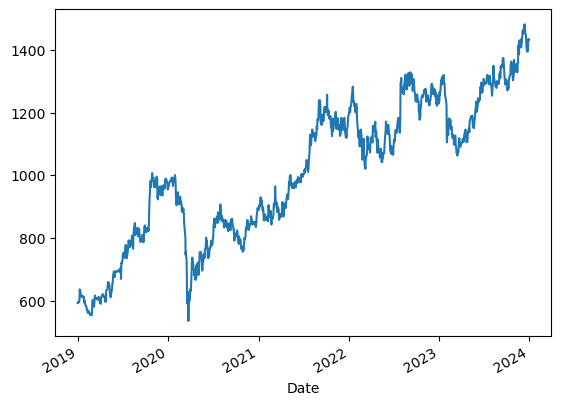

In [63]:
sbi['price_t'].plot()

#### Visualize the trend of stock daily returns.

<Axes: xlabel='Date'>

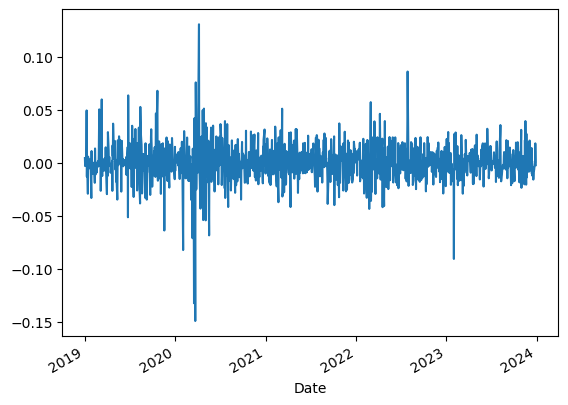

In [64]:
sbi['daily_returns'].plot()

#### When we compare the trend of stock price and stock returns, we can observe that the stock price of SBILIFE Insurance is in the Downtrend in 2020 accordingly the stock returns some how show same pattern. This means sometims the stock returns are predictable.

#### Moving Average

In [65]:
sbi['mov_avg'] = sbi['price_t'].rolling(30).mean()

<Axes: xlabel='Date'>

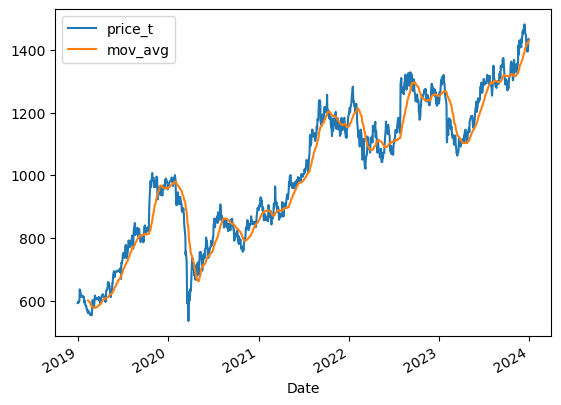

In [66]:
sbi[['price_t', 'mov_avg']].plot()

#### Volatility Measures (30-day)

In [67]:
sbi['Log_Ret'] = np.log(sbi['price_t'] / sbi['price_t'].shift(1))
# Compute Volatility using the pandas rolling standard deviation function
sbi['volatility'] = sbi['Log_Ret'].rolling(window=30).std() * np.sqrt(30)

<Axes: xlabel='Date'>

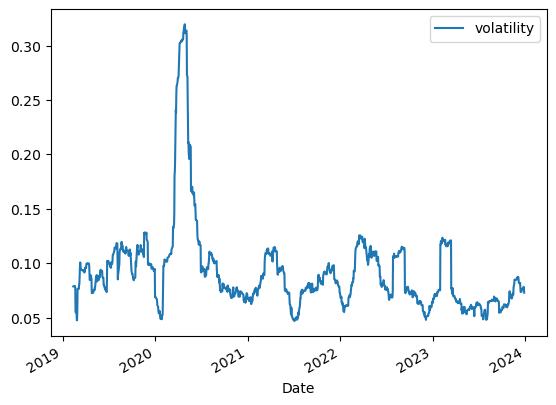

In [68]:
sbi[['volatility']].plot()

#### RSI (30-day)

In [69]:
change = sbi["price_t"].diff()
change.dropna(inplace=True)

In [70]:
# Create two copies of the Closing price Series
change_up = change.copy()
change_down = change.copy()


change_up[change_up<0] = 0
change_down[change_down>0] = 0

# Verify that we did not make any mistakes
change.equals(change_up+change_down)

# Calculate the rolling average of average up and average down
avg_up = change_up.rolling(30).mean()
avg_down = change_down.rolling(30).mean().abs()

rsi = 100 * avg_up / (avg_up + avg_down)

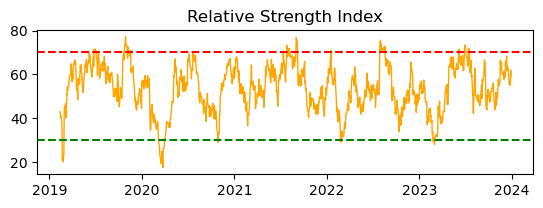

In [71]:
# Create chart on the same figure.
ax = plt.subplot2grid((10,1), (5,0), rowspan = 4, colspan = 1)

# Plot the RSI
ax.set_title('Relative Strength Index')
ax.plot(rsi, color='orange', linewidth=1)

# Add two horizontal lines, signalling the buy and sell ranges.
# Oversold
ax.axhline(30, linestyle='--', linewidth=1.5, color='green')
# Overbought
ax.axhline(70, linestyle='--', linewidth=1.5, color='red')

## Correlation Matrix Between Stocks and Indices.

In [72]:
tkr = ['HDFCLIFE.NS','ICICIGI.NS','LICI.NS','ICICIPRULI.NS','SBILIFE.NS','^NSEI','^NSEBANK']
ins = yf.download(tkr, start="2019-01-01", end="2023-12-30",group_by='tkr')

[*********************100%%**********************]  7 of 7 completed


In [73]:
close_prices = pd.DataFrame()
for i in tkr:
    close_prices[i] = ins[i]['Adj Close']

## compute the correlation matrix

In [74]:
corr_matrix = close_prices.corr()
corr_matrix

,HDFCLIFE.NS,ICICIGI.NS,LICI.NS,ICICIPRULI.NS,SBILIFE.NS,^NSEI,^NSEBANK
HDFCLIFE.NS,1.000000,0.918547,0.371117,0.808611,0.565700,0.501733,0.388834
ICICIGI.NS,0.918547,1.000000,0.444725,0.790364,0.458447,0.396008,0.277592
LICI.NS,0.371117,0.444725,1.000000,0.366316,0.271522,0.051566,-0.160813
ICICIPRULI.NS,0.808611,0.790364,0.366316,1.000000,0.746727,0.679827,0.570499
SBILIFE.NS,0.565700,0.458447,0.271522,0.746727,1.000000,0.929080,0.865294
^NSEI,0.501733,0.396008,0.051566,0.679827,0.929080,1.000000,0.951029
^NSEBANK,0.388834,0.277592,-0.160813,0.570499,0.865294,0.951029,1.000000


## create a heatmap of the correlation matrix using Seaborn

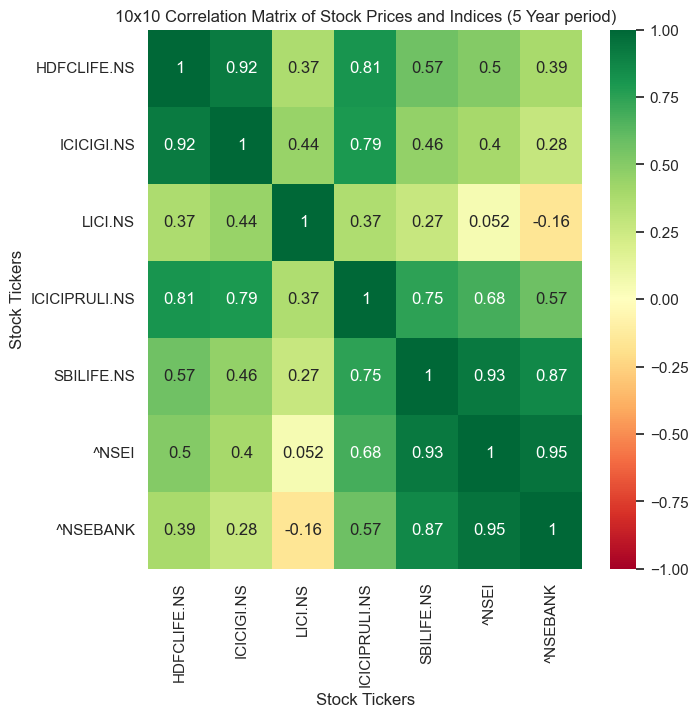

In [75]:
sn.set(style='white')
fig, ax = plt.subplots(figsize=(7, 7))
sn.heatmap(corr_matrix, annot=True, cmap='RdYlGn', vmin=-1, vmax=1, ax=ax)# set the axis labels and title
ax.set_xlabel('Stock Tickers')
ax.set_ylabel('Stock Tickers')
ax.set_title('10x10 Correlation Matrix of Stock Prices and Indices (5 Year period)')

# display the plot
plt.show()

### Sector-wise Analysis

In [76]:
# Define a list of stock tickers representing each sector
tickers = ['HDFCLIFE.NS','ICICIGI.NS','LICI.NS','ICICIPRULI.NS','SBILIFE.NS']

# Function to fetch historical stock price data
def get_stock_data(tickers):
    data = pd.DataFrame() 
    for ticker in tickers:
        try:
            stock_data = yf.download(ticker, start='2019-01-01', end='2023-12-30')['Adj Close']
            data[ticker] = stock_data
        except Exception as e:
            print(f"Error fetching data for {ticker}: {e}")
    return data

# Get historical stock price data for each stocks
data = get_stock_data(tickers)

# Check the retrieved data
print("Data:")
print(data.head())

# Continue with the rest of the analysis...

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
Data:
            HDFCLIFE.NS  ICICIGI.NS  LICI.NS  ICICIPRULI.NS  SBILIFE.NS
Date                                                                   
2019-01-01   381.220184  847.304260      NaN     322.303589  592.671570
2019-01-02   385.906464  849.438721      NaN     316.270844  595.492249
2019-01-03   386.054443  842.404114      NaN     312.760071  593.859253
2019-01-04   388.224945  841.142761      NaN     321.116821  596.630371
2019-01-07   387.780975  839.735901      NaN     316.419281  596.234436


In [77]:
# Define a list of stock tickers representing each sector
tickers = ['HDFCLIFE.NS','ICICIGI.NS','LICI.NS','ICICIPRULI.NS','SBILIFE.NS']


# Function to fetch historical stock price data
def get_stock_data(tickers):
    data = pd.DataFrame()
    for ticker in tickers:
        try:
            stock_data = yf.download(ticker, start='2019-01-01', end='2023-12-31')['Adj Close']
            data[ticker] = stock_data
        except Exception as e:
            print(f"Error fetching data for {ticker}: {e}")
    return data

# Get historical stock price data for each sector
data = get_stock_data(tickers)

# Calculate cumulative returns for each sector
cumulative_returns = (1 + data.pct_change()).cumprod()


# Calculate overall cumulative returns for each sector
overall_returns = cumulative_returns.iloc[-1, :]


# Identify leaders and laggards
leader = overall_returns.idxmax()
laggard = overall_returns.idxmin()


# Print results
print(f"Sector - Leader: {leader}, Laggard: {laggard}")

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
Sector - Leader: SBILIFE.NS, Laggard: LICI.NS


### Time Series Analysis

## Trend Analysis

### HDFCLIFE

[*********************100%%**********************]  1 of 1 completed


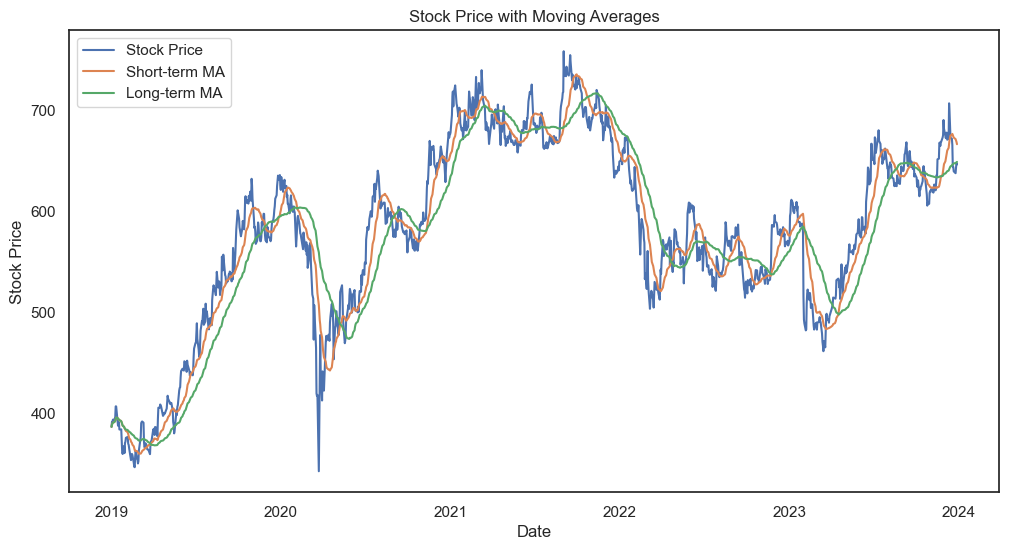

In [78]:
# Function to fetch historical stock prices from Yahoo Finance
def get_stock_data(ticker, start_date, end_date):
    stock_data = yf.download(ticker, start=start_date, end=end_date)
    return stock_data

# Function to calculate moving averages
def calculate_moving_averages(data, short_window, long_window):
    data['Short_MA'] = data['Close'].rolling(window=short_window, min_periods=1).mean()
    data['Long_MA'] = data['Close'].rolling(window=long_window, min_periods=1).mean()
    return data

# Function to plot stock prices and moving averages
def plot_stock_data(data):
    plt.figure(figsize=(12, 6))
    plt.plot(data['Close'], label='Stock Price')
    plt.plot(data['Short_MA'], label='Short-term MA')
    plt.plot(data['Long_MA'], label='Long-term MA')

    plt.title('Stock Price with Moving Averages')
    plt.xlabel('Date')
    plt.ylabel('Stock Price')
    plt.legend()
    plt.show()

# Define the stock symbol and date range
ticker_symbol = 'HDFCLIFE.NS'
start_date = '2019-01-01'
end_date = '2023-12-30'

# Fetch historical stock prices
stock_data = get_stock_data(ticker_symbol, start_date, end_date)

# Define the short and long windows for moving averages
short_window = 20
long_window = 50

# Calculate moving averages
stock_data = calculate_moving_averages(stock_data, short_window, long_window)

# Plot the stock prices and moving averages
plot_stock_data(stock_data)

### ICICIGI

[*********************100%%**********************]  1 of 1 completed


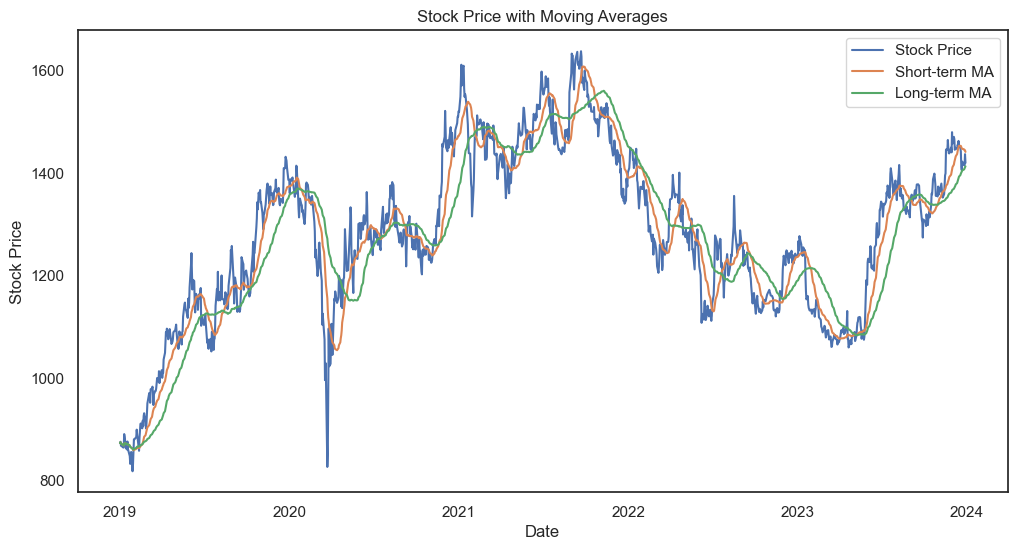

In [79]:
# Function to fetch historical stock prices from Yahoo Finance
def get_stock_data(ticker, start_date, end_date):
    stock_data = yf.download(ticker, start=start_date, end=end_date)
    return stock_data

# Function to calculate moving averages
def calculate_moving_averages(data, short_window, long_window):
    data['Short_MA'] = data['Close'].rolling(window=short_window, min_periods=1).mean()
    data['Long_MA'] = data['Close'].rolling(window=long_window, min_periods=1).mean()
    return data

# Function to plot stock prices and moving averages
def plot_stock_data(data):
    plt.figure(figsize=(12, 6))
    plt.plot(data['Close'], label='Stock Price')
    plt.plot(data['Short_MA'], label='Short-term MA')
    plt.plot(data['Long_MA'], label='Long-term MA')

    plt.title('Stock Price with Moving Averages')
    plt.xlabel('Date')
    plt.ylabel('Stock Price')
    plt.legend()
    plt.show()

# Define the stock symbol and date range
ticker_symbol = 'ICICIGI.NS'
start_date = '2019-01-01'
end_date = '2023-12-30'

# Fetch historical stock prices
stock_data = get_stock_data(ticker_symbol, start_date, end_date)

# Define the short and long windows for moving averages
short_window = 20
long_window = 50

# Calculate moving averages
stock_data = calculate_moving_averages(stock_data, short_window, long_window)

# Plot the stock prices and moving averages
plot_stock_data(stock_data)

### LICI

[*********************100%%**********************]  1 of 1 completed


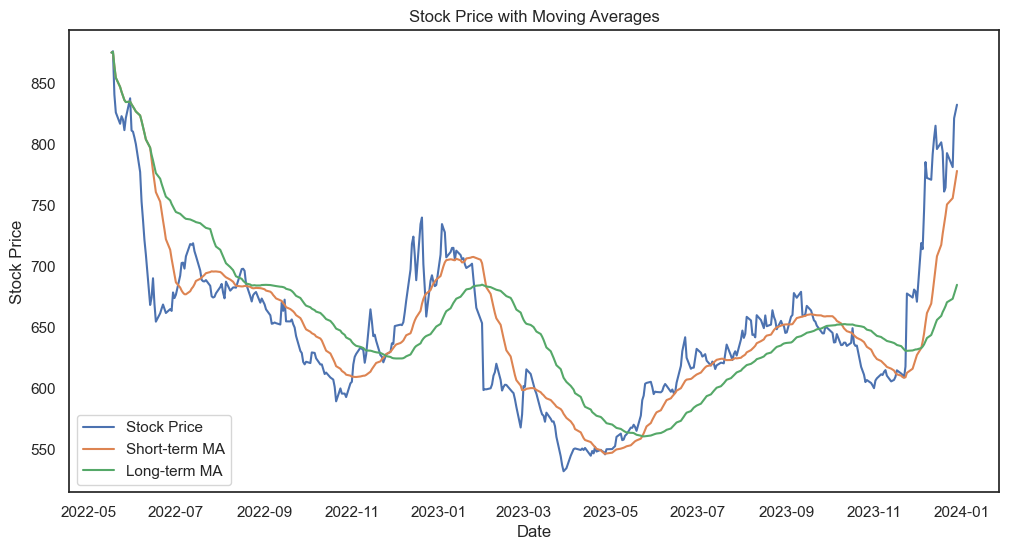

In [80]:
# Function to fetch historical stock prices from Yahoo Finance
def get_stock_data(ticker, start_date, end_date):
    stock_data = yf.download(ticker, start=start_date, end=end_date)
    return stock_data

# Function to calculate moving averages
def calculate_moving_averages(data, short_window, long_window):
    data['Short_MA'] = data['Close'].rolling(window=short_window, min_periods=1).mean()
    data['Long_MA'] = data['Close'].rolling(window=long_window, min_periods=1).mean()
    return data

# Function to plot stock prices and moving averages
def plot_stock_data(data):
    plt.figure(figsize=(12, 6))
    plt.plot(data['Close'], label='Stock Price')
    plt.plot(data['Short_MA'], label='Short-term MA')
    plt.plot(data['Long_MA'], label='Long-term MA')

    plt.title('Stock Price with Moving Averages')
    plt.xlabel('Date')
    plt.ylabel('Stock Price')
    plt.legend()
    plt.show()

# Define the stock symbol and date range
ticker_symbol = 'LICI.NS'
start_date = '2019-01-01'
end_date = '2023-12-30'

# Fetch historical stock prices
stock_data = get_stock_data(ticker_symbol, start_date, end_date)

# Define the short and long windows for moving averages
short_window = 20
long_window = 50

# Calculate moving averages
stock_data = calculate_moving_averages(stock_data, short_window, long_window)

# Plot the stock prices and moving averages
plot_stock_data(stock_data)

### ICICIPRULI

[*********************100%%**********************]  1 of 1 completed


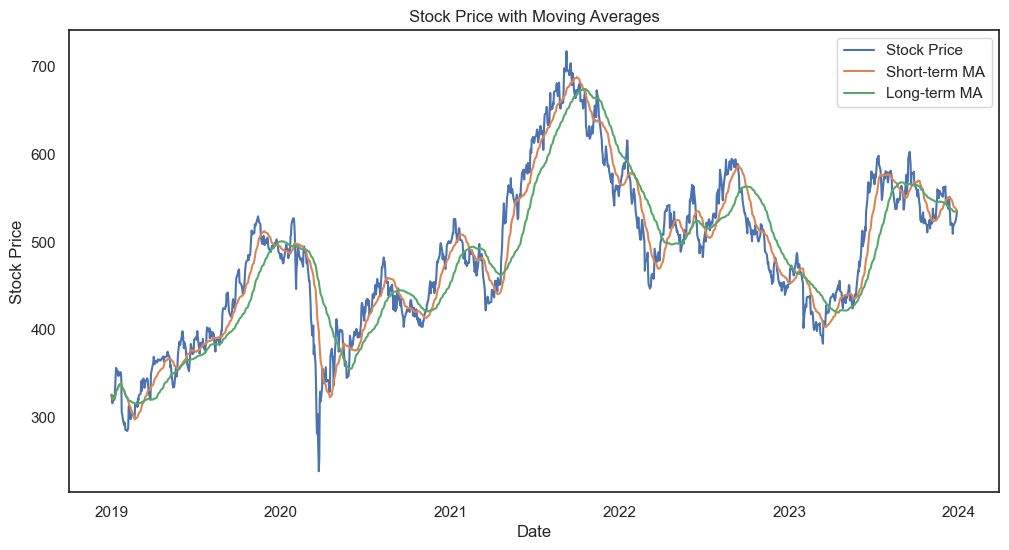

In [81]:
# Function to fetch historical stock prices from Yahoo Finance
def get_stock_data(ticker, start_date, end_date):
    stock_data = yf.download(ticker, start=start_date, end=end_date)
    return stock_data

# Function to calculate moving averages
def calculate_moving_averages(data, short_window, long_window):
    data['Short_MA'] = data['Close'].rolling(window=short_window, min_periods=1).mean()
    data['Long_MA'] = data['Close'].rolling(window=long_window, min_periods=1).mean()
    return data

# Function to plot stock prices and moving averages
def plot_stock_data(data):
    plt.figure(figsize=(12, 6))
    plt.plot(data['Close'], label='Stock Price')
    plt.plot(data['Short_MA'], label='Short-term MA')
    plt.plot(data['Long_MA'], label='Long-term MA')

    plt.title('Stock Price with Moving Averages')
    plt.xlabel('Date')
    plt.ylabel('Stock Price')
    plt.legend()
    plt.show()

# Define the stock symbol and date range
ticker_symbol = 'ICICIPRULI.NS'
start_date = '2019-01-01'
end_date = '2023-12-30'

# Fetch historical stock prices
stock_data = get_stock_data(ticker_symbol, start_date, end_date)

# Define the short and long windows for moving averages
short_window = 20
long_window = 50

# Calculate moving averages
stock_data = calculate_moving_averages(stock_data, short_window, long_window)

# Plot the stock prices and moving averages
plot_stock_data(stock_data)

### SBILIFE

[*********************100%%**********************]  1 of 1 completed


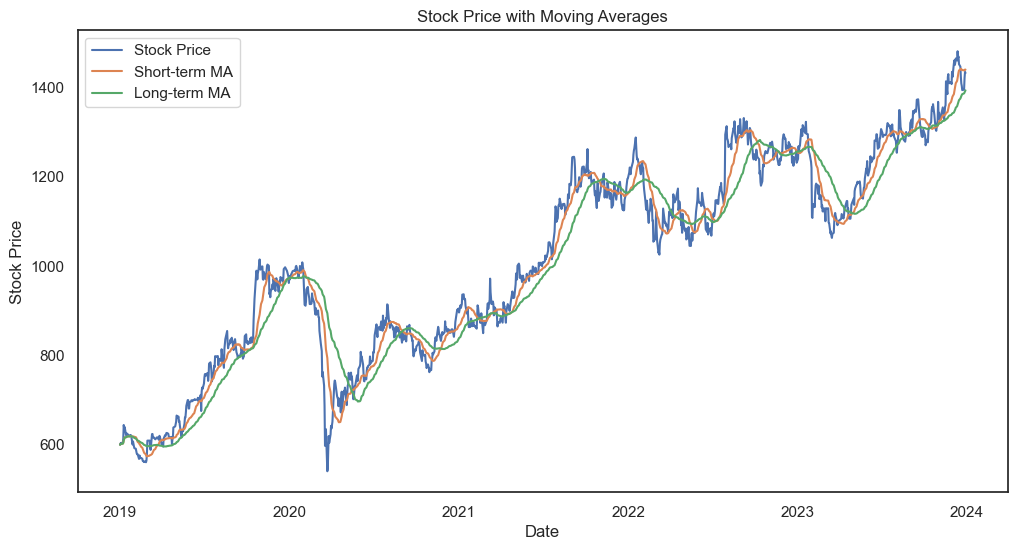

In [82]:
# Function to fetch historical stock prices from Yahoo Finance
def get_stock_data(ticker, start_date, end_date):
    stock_data = yf.download(ticker, start=start_date, end=end_date)
    return stock_data

# Function to calculate moving averages
def calculate_moving_averages(data, short_window, long_window):
    data['Short_MA'] = data['Close'].rolling(window=short_window, min_periods=1).mean()
    data['Long_MA'] = data['Close'].rolling(window=long_window, min_periods=1).mean()
    return data

# Function to plot stock prices and moving averages
def plot_stock_data(data):
    plt.figure(figsize=(12, 6))
    plt.plot(data['Close'], label='Stock Price')
    plt.plot(data['Short_MA'], label='Short-term MA')
    plt.plot(data['Long_MA'], label='Long-term MA')

    plt.title('Stock Price with Moving Averages')
    plt.xlabel('Date')
    plt.ylabel('Stock Price')
    plt.legend()
    plt.show()

# Define the stock symbol and date range
ticker_symbol = 'SBILIFE.NS'
start_date = '2019-01-01'
end_date = '2023-12-30'

# Fetch historical stock prices
stock_data = get_stock_data(ticker_symbol, start_date, end_date)

# Define the short and long windows for moving averages
short_window = 20
long_window = 50

# Calculate moving averages
stock_data = calculate_moving_averages(stock_data, short_window, long_window)

# Plot the stock prices and moving averages
plot_stock_data(stock_data)

[*********************100%%**********************]  5 of 5 completed
[*********************100%%**********************]  2 of 2 completed


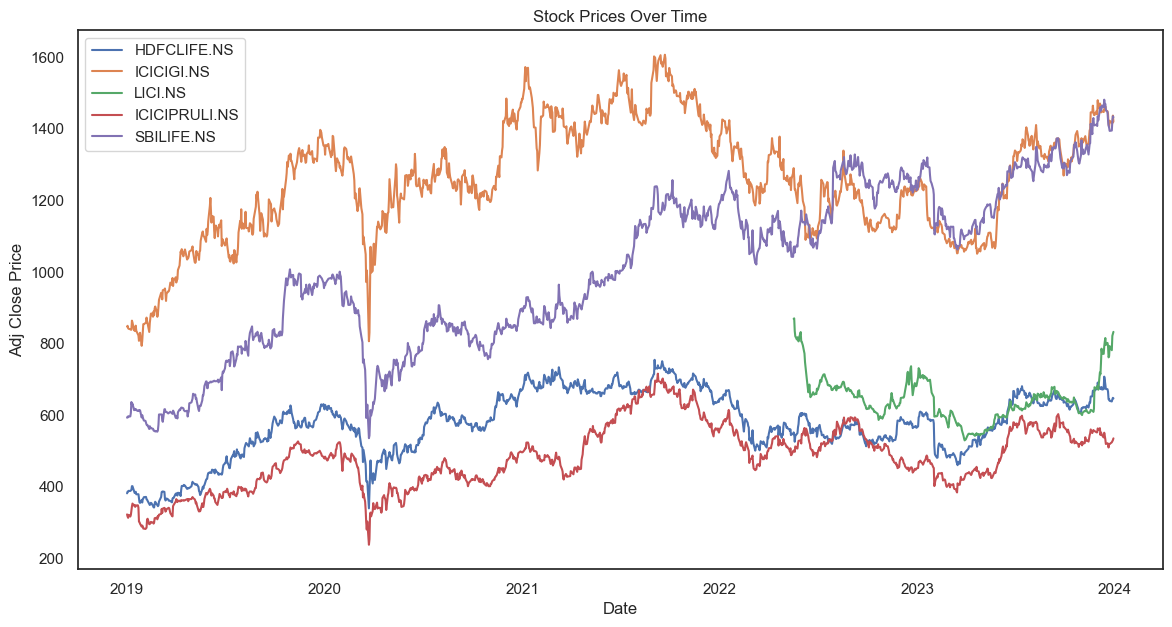

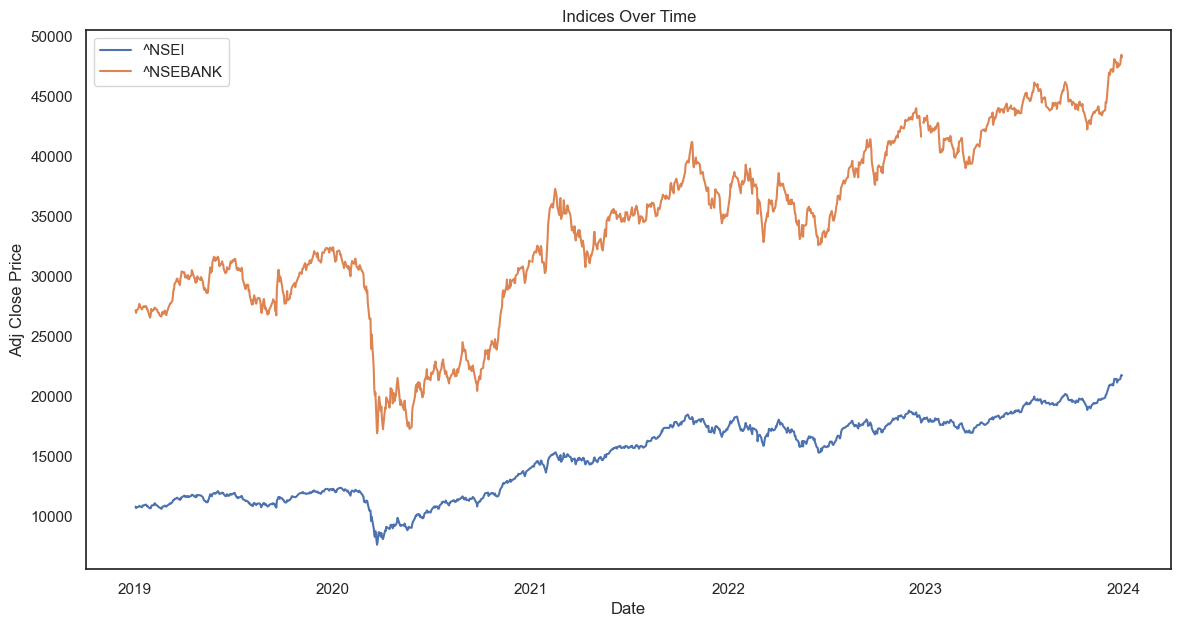

In [83]:
# Function to fetch historical stock and index data from Yahoo Finance
def get_data(tickers, start_date, end_date):
    data = yf.download(tickers, start=start_date, end=end_date)
    return data['Adj Close']

# Define the stock symbols, index symbols, and date range
stock_symbols = ['HDFCLIFE.NS','ICICIGI.NS','LICI.NS','ICICIPRULI.NS','SBILIFE.NS'] 
index_symbols = ['^NSEI', '^NSEBANK']  # Example index symbols
start_date = '2019-01-01'
end_date = '2023-12-30'

# Fetch historical stock and index data
stock_data = get_data(stock_symbols, start_date, end_date)
index_data = get_data(index_symbols, start_date, end_date)

# Plotting the stock prices
plt.figure(figsize=(14, 7))
for stock_symbol in stock_symbols:
    plt.plot(stock_data[stock_symbol], label=stock_symbol)

plt.title('Stock Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Adj Close Price')
plt.legend()
plt.show()

# Plotting the indices
plt.figure(figsize=(14, 7))
for index_symbol in index_symbols:
    plt.plot(index_data[index_symbol], label=index_symbol)

plt.title('Indices Over Time')
plt.xlabel('Date')
plt.ylabel('Adj Close Price')
plt.legend()
plt.show()


### Volatility Analysis

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  2 of 2 completed


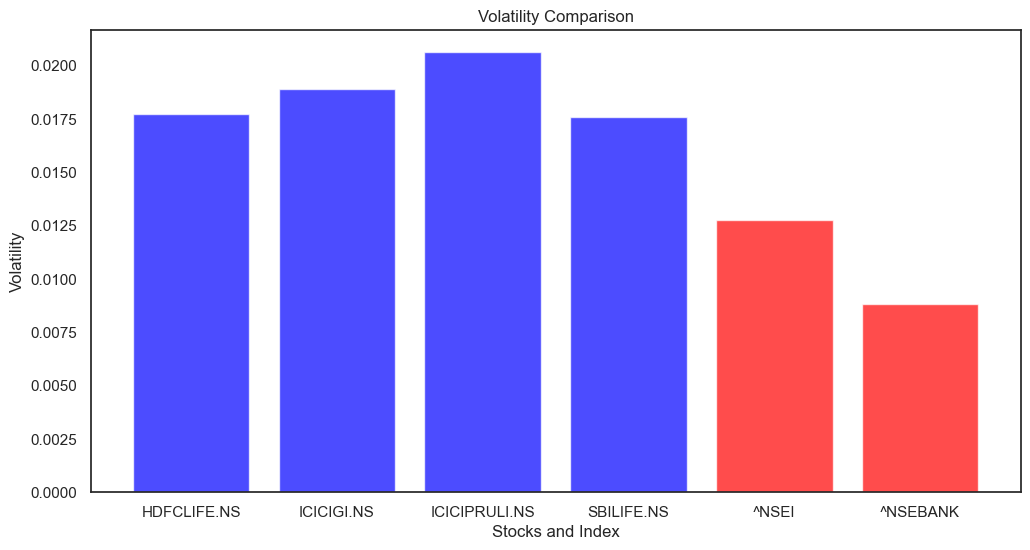

Stock Volatilities:
HDFCLIFE.NS      0.017745
ICICIGI.NS       0.018913
ICICIPRULI.NS    0.020633
SBILIFE.NS       0.017583
dtype: float64

Index Volatility:
^NSEBANK    0.012766
^NSEI       0.008812
dtype: float64


In [98]:
# Function to fetch historical stock prices from Yahoo Finance
def get_stock_data(ticker, start_date, end_date):
    stock_data = yf.download(ticker, start=start_date, end=end_date)
    return stock_data['Adj Close']

# Function to calculate volatility
def calculate_volatility(returns):
    return returns.std()

# Define the stock tickers and index
stock_tickers = ['HDFCLIFE.NS','ICICIGI.NS','ICICIPRULI.NS','SBILIFE.NS']
index_ticker = '^NSEI','^NSEBANK'  

# Define the date range for historical data
start_date = '2019-01-01'
end_date = '2019-12-30'

# Fetch stock data for each stock and index
stock_data = pd.DataFrame({ticker: get_stock_data(ticker, start_date, end_date) for ticker in stock_tickers})
index_data = get_stock_data(index_ticker, start_date, end_date)

# Calculate daily returns for each stock and index
stock_returns = stock_data.pct_change().dropna()
index_returns = index_data.pct_change().dropna()

# Calculate volatility for each stock and index
stock_volatility = stock_returns.apply(calculate_volatility)
index_volatility = calculate_volatility(index_returns)

# Plotting the volatility
plt.figure(figsize=(12, 6))

for ticker in stock_tickers:
    plt.bar(ticker, stock_volatility[ticker], color='blue', alpha=0.7)

plt.bar(index_ticker, index_volatility, color='red', alpha=0.7)

plt.title('Volatility Comparison')
plt.xlabel('Stocks and Index')
plt.ylabel('Volatility')
plt.show()

# Display the calculated volatilities
print("Stock Volatilities:")
print(stock_volatility)

print("\nIndex Volatility:")
print(index_volatility)

### Seasonal Patterns

### HDFCLIFE

[*********************100%%**********************]  1 of 1 completed
                  Open        High         Low       Close   Adj Close  Volume
Date                                                                          
2019-01-01  387.799988  388.899994  385.100006  386.399994  381.220184  244225
2019-01-02  385.950012  392.500000  385.100006  391.149994  385.906464  401487
2019-01-03  392.649994  395.500000  389.500000  391.299988  386.054443  391423
2019-01-04  392.000000  394.950012  387.750000  393.500000  388.224945  484014
2019-01-07  394.500000  395.399994  390.100006  393.049988  387.780975  346567


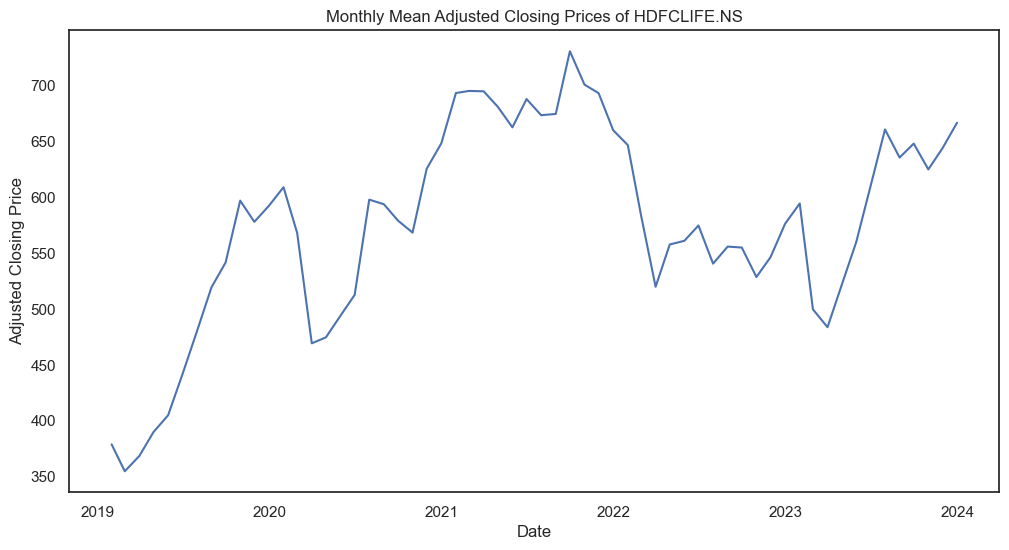

In [85]:
# Define the stock symbol and the time period
stock_symbol = "HDFCLIFE.NS"
start_date = "2019-01-01"
end_date = "2023-12-30"

# Fetch historical stock data from Yahoo Finance
stock_data = yf.download(stock_symbol, start=start_date, end=end_date)

# Print the first few rows of the data to understand its structure
print(stock_data.head())

# Extract the adjusted closing prices (to account for stock splits and dividends)
closing_prices = stock_data['Adj Close']

# Resample the data to monthly frequency and calculate the mean closing price for each month
monthly_mean_prices = closing_prices.resample('M').mean()

# Plot the monthly mean closing prices over time
plt.figure(figsize=(12, 6))
sn.lineplot(x=monthly_mean_prices.index, y=monthly_mean_prices.values)
plt.title(f'Monthly Mean Adjusted Closing Prices of {stock_symbol}')
plt.xlabel('Date')
plt.ylabel('Adjusted Closing Price')
plt.show()

### ICICIGI

[*********************100%%**********************]  1 of 1 completed
                  Open        High    Low       Close   Adj Close  Volume
Date                                                                     
2019-01-01  854.000000  878.950012  854.0  873.250000  847.304260  100438
2019-01-02  870.000000  884.500000  860.0  875.450012  849.438721  170450
2019-01-03  875.000000  884.000000  860.0  868.200012  842.404114  124566
2019-01-04  862.099976  874.000000  850.5  866.900024  841.142761  234451
2019-01-07  868.000000  886.950012  860.0  865.450012  839.735901  116260


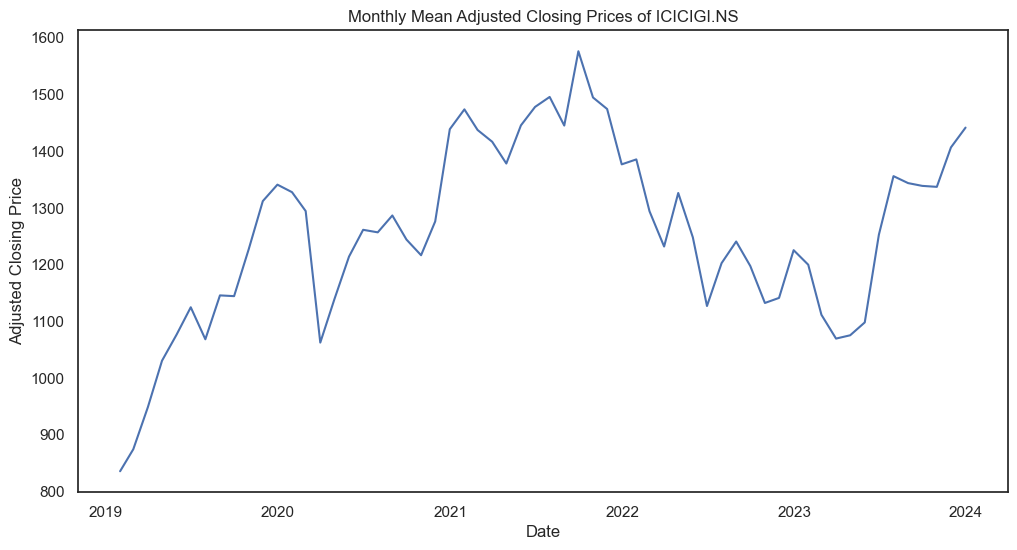

In [86]:
# Define the stock symbol and the time period
stock_symbol = "ICICIGI.NS"
start_date = "2019-01-01"
end_date = "2023-12-30"

# Fetch historical stock data from Yahoo Finance
stock_data = yf.download(stock_symbol, start=start_date, end=end_date)

# Print the first few rows of the data to understand its structure
print(stock_data.head())

# Extract the adjusted closing prices (to account for stock splits and dividends)
closing_prices = stock_data['Adj Close']

# Resample the data to monthly frequency and calculate the mean closing price for each month
monthly_mean_prices = closing_prices.resample('M').mean()

# Plot the monthly mean closing prices over time
plt.figure(figsize=(12, 6))
sn.lineplot(x=monthly_mean_prices.index, y=monthly_mean_prices.values)
plt.title(f'Monthly Mean Adjusted Closing Prices of {stock_symbol}')
plt.xlabel('Date')
plt.ylabel('Adjusted Closing Price')
plt.show()

### LICI

[*********************100%%**********************]  1 of 1 completed
                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2022-05-17  872.000000  918.950012  860.000000  875.250000  869.138428   
2022-05-18  885.549988  891.000000  874.099976  876.349976  870.230713   
2022-05-19  867.000000  867.000000  838.000000  840.849976  834.978577   
2022-05-20  848.549988  856.799988  825.000000  826.150024  820.381226   
2022-05-23  826.150024  852.700012  803.650024  816.849976  811.146118   

              Volume  
Date                  
2022-05-17  48792877  
2022-05-18   8919761  
2022-05-19   7372427  
2022-05-20   7078291  
2022-05-23  12444648  


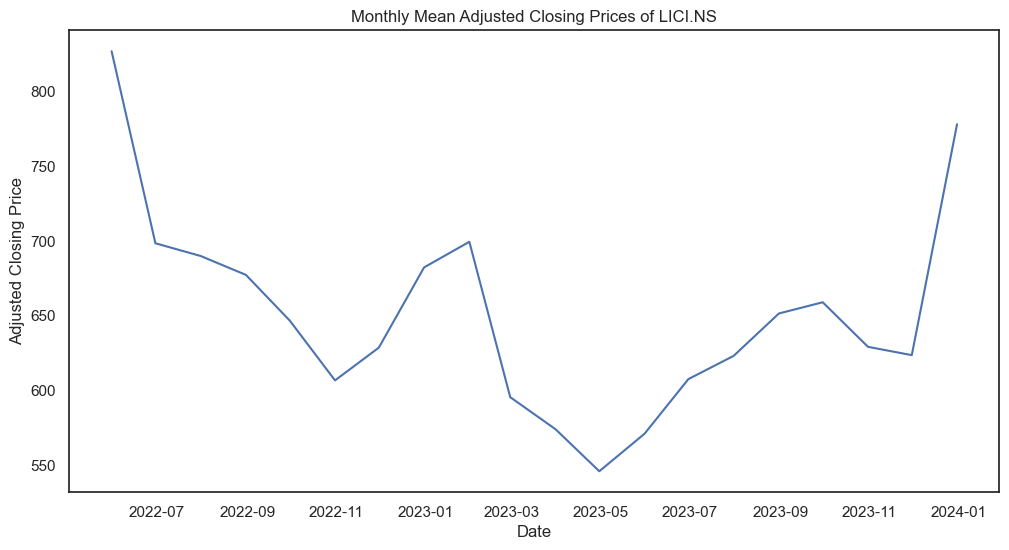

In [87]:
# Define the stock symbol and the time period
stock_symbol = "LICI.NS"
start_date = "2019-01-01"
end_date = "2023-12-30"

# Fetch historical stock data from Yahoo Finance
stock_data = yf.download(stock_symbol, start=start_date, end=end_date)

# Print the first few rows of the data to understand its structure
print(stock_data.head())

# Extract the adjusted closing prices (to account for stock splits and dividends)
closing_prices = stock_data['Adj Close']

# Resample the data to monthly frequency and calculate the mean closing price for each month
monthly_mean_prices = closing_prices.resample('M').mean()

# Plot the monthly mean closing prices over time
plt.figure(figsize=(12, 6))
sn.lineplot(x=monthly_mean_prices.index, y=monthly_mean_prices.values)
plt.title(f'Monthly Mean Adjusted Closing Prices of {stock_symbol}')
plt.xlabel('Date')
plt.ylabel('Adjusted Closing Price')
plt.show()

### ICICIPRULI

[*********************100%%**********************]  1 of 1 completed
                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2019-01-01  324.500000  327.200012  322.200012  325.899994  322.303589   
2019-01-02  323.700012  327.000000  318.100006  319.799988  316.270844   
2019-01-03  318.049988  320.850006  315.450012  316.250000  312.760071   
2019-01-04  316.950012  326.299988  316.049988  324.700012  321.116821   
2019-01-07  326.149994  328.549988  319.000000  319.950012  316.419281   

             Volume  
Date                 
2019-01-01   360248  
2019-01-02   409481  
2019-01-03   580055  
2019-01-04  1026786  
2019-01-07  1088274  


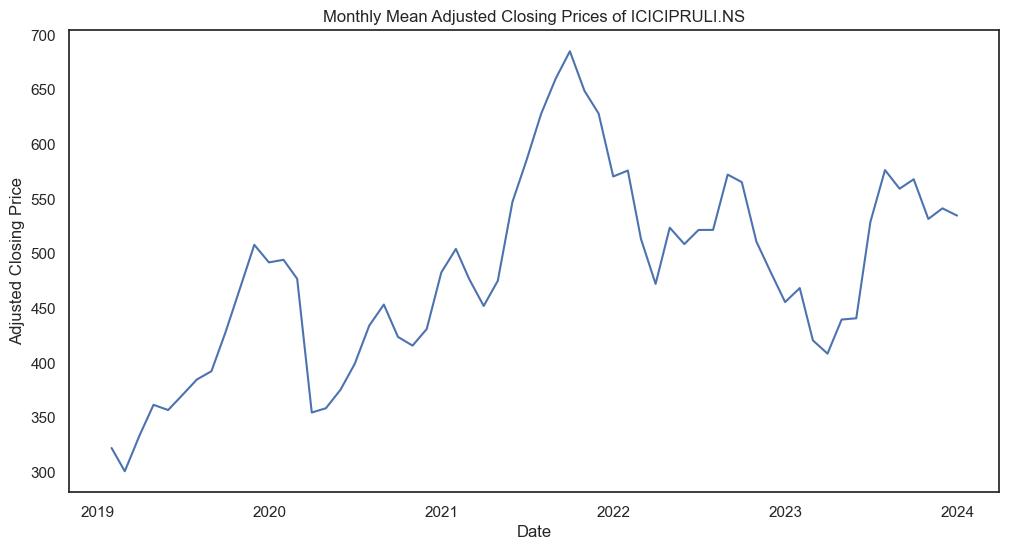

In [88]:
# Define the stock symbol and the time period
stock_symbol = "ICICIPRULI.NS"
start_date = "2019-01-01"
end_date = "2023-12-30"

# Fetch historical stock data from Yahoo Finance
stock_data = yf.download(stock_symbol, start=start_date, end=end_date)

# Print the first few rows of the data to understand its structure
print(stock_data.head())

# Extract the adjusted closing prices (to account for stock splits and dividends)
closing_prices = stock_data['Adj Close']

# Resample the data to monthly frequency and calculate the mean closing price for each month
monthly_mean_prices = closing_prices.resample('M').mean()

# Plot the monthly mean closing prices over time
plt.figure(figsize=(12, 6))
sn.lineplot(x=monthly_mean_prices.index, y=monthly_mean_prices.values)
plt.title(f'Monthly Mean Adjusted Closing Prices of {stock_symbol}')
plt.xlabel('Date')
plt.ylabel('Adjusted Closing Price')
plt.show()

### SBILIFE

[*********************100%%**********************]  1 of 1 completed
                  Open        High         Low       Close   Adj Close  Volume
Date                                                                          
2019-01-01  595.250000  601.799988  592.200012  598.849976  592.671570   40902
2019-01-02  593.400024  604.000000  593.400024  601.700012  595.492249  115282
2019-01-03  598.400024  603.000000  590.000000  600.049988  593.859253  415471
2019-01-04  603.000000  615.000000  600.000000  602.849976  596.630371  119061
2019-01-07  602.849976  608.849976  597.700012  602.450012  596.234436  316222


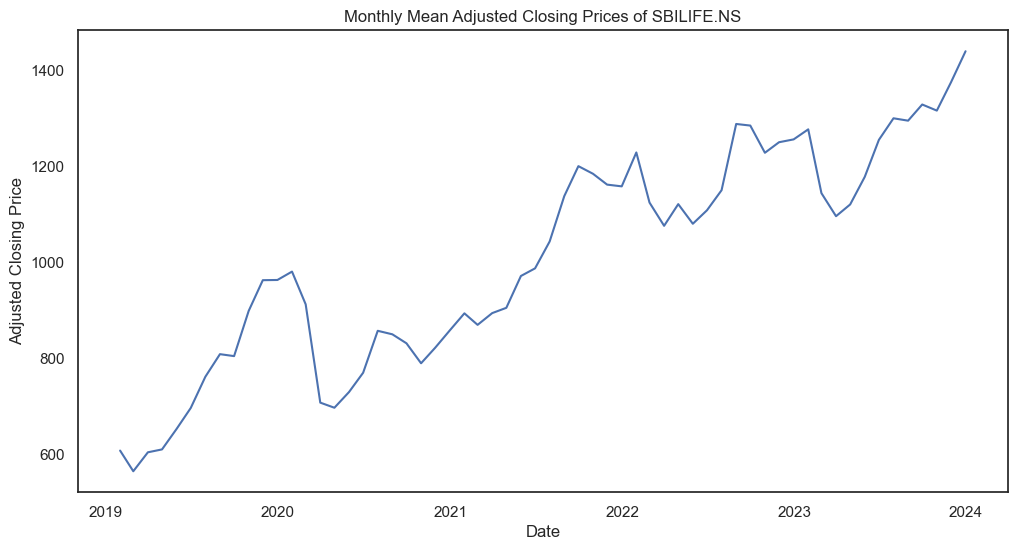

In [89]:
# Define the stock symbol and the time period
stock_symbol = "SBILIFE.NS"
start_date = "2019-01-01"
end_date = "2023-12-30"

# Fetch historical stock data from Yahoo Finance
stock_data = yf.download(stock_symbol, start=start_date, end=end_date)

# Print the first few rows of the data to understand its structure
print(stock_data.head())

# Extract the adjusted closing prices (to account for stock splits and dividends)
closing_prices = stock_data['Adj Close']

# Resample the data to monthly frequency and calculate the mean closing price for each month
monthly_mean_prices = closing_prices.resample('M').mean()

# Plot the monthly mean closing prices over time
plt.figure(figsize=(12, 6))
sn.lineplot(x=monthly_mean_prices.index, y=monthly_mean_prices.values)
plt.title(f'Monthly Mean Adjusted Closing Prices of {stock_symbol}')
plt.xlabel('Date')
plt.ylabel('Adjusted Closing Price')
plt.show()

### Fundamental Analysis

In [90]:
# Function to fetch financial data from Yahoo Finance
def get_financial_data(stock_tickers, start_date, end_date):
    return stock_data['Adj Close']

# Function to calculate financial ratios
def calculate_ratios(stock_data):
    ratios = pd.DataFrame()

    # Calculate key financial ratios
    ratios['Return on Equity (ROE)'] = stock_data.pct_change().mean() * 252  # Assuming 252 trading days in a year
    ratios['Return on Assets (ROA)'] = stock_data.pct_change().mean() * 252 / data.mean()
    ratios['Debt to Equity Ratio'] = stock_data.diff().sum() / data.diff(-1).sum()

    return ratios

# Set the start and end dates for financial data
start_date = '2019-01-01'
end_date = '2023-12-30'

# Fetch financial data
financial_data = get_financial_data(stock_tickers, start_date, end_date)

# Calculate ratios
financial_ratios = calculate_ratios(financial_data)

# Display the calculated ratios
print("Financial Ratios:")
print(financial_ratios)

Financial Ratios:
               Return on Equity (ROE)  Return on Assets (ROA)  \
HDFCLIFE.NS                       NaN                0.000384   
ICICIGI.NS                        NaN                0.000176   
LICI.NS                           NaN                0.000342   
ICICIPRULI.NS                     NaN                0.000458   
SBILIFE.NS                        NaN                0.000219   

               Debt to Equity Ratio  
HDFCLIFE.NS               -3.163812  
ICICIGI.NS                -1.466366  
LICI.NS                   22.924794  
ICICIPRULI.NS             -3.951741  
SBILIFE.NS                -1.000000  


In [91]:
# List of stock tickers for the companies you want to analyze
sector_tickers = {'Oil & Gas':  ['RELIANCE.NS', 'HINDPETRO.NS', 'BPCL.NS','IOC.NS','ONGC.NS'], 'Insurance': ['HDFCLIFE.NS','ICICIGI.NS','LICI.NS','ICICIPRULI.NS','SBILIFE.NS']}

# Function to fetch financial data from Yahoo Finance
def get_financial_data(stock_tickers, start_date, end_date):
    return stock_data['Adj Close']

# Function to calculate financial ratios
def calculate_ratios(data):
    ratios = pd.DataFrame()

    # Calculate key financial ratios
    ratios['Return on Equity (ROE)'] = stock_data.pct_change().mean() * 252  # Assuming 252 trading days in a year
    ratios['Return on Assets (ROA)'] = stock_data.pct_change().mean() * 252 / data.mean()
    ratios['Debt to Equity Ratio'] = stock_data.diff().sum() / data.diff(-1).sum()

    return ratios

# Function to compare ratios across companies and sectors
def compare_ratios(companies, sector_data):
    comparisons = pd.DataFrame()

    for company in companies:
        company_data = get_financial_data([company], start_date, end_date)
        company_ratios = calculate_ratios(company_data)
        comparisons[company] = company_ratios.iloc[:, 0]  # Assuming ROE for comparison

    for sector, sector_companies in sector_data.items():
        sector_data = get_financial_data(sector_companies, start_date, end_date)
        sector_ratios = calculate_ratios(sector_data)
        comparisons[sector] = sector_ratios.mean(axis=1)

    return comparisons

# Set the start and end dates for financial data
start_date = '2019-01-01'
end_date = '2023-12-30'

# Compare ratios across companies and sectors
comparison_data = compare_ratios(stock_tickers, sector_tickers)

# Display the comparison data
print("Comparison of Ratios:")
print(comparison_data)

Comparison of Ratios:
           HDFCLIFE.NS  ICICIGI.NS   LICI.NS  ICICIPRULI.NS  SBILIFE.NS  \
Open          0.230335    0.230335  0.230335       0.230335    0.230335   
High          0.213688    0.213688  0.213688       0.213688    0.213688   
Low           0.226453    0.226453  0.226453       0.226453    0.226453   
Close         0.219181    0.219181  0.219181       0.219181    0.219181   
Adj Close     0.221302    0.221302  0.221302       0.221302    0.221302   
Volume             inf         inf       inf            inf         inf   

           Oil & Gas  Insurance  
Open       -0.255614  -0.255614  
High       -0.259462  -0.259462  
Low        -0.253378  -0.253378  
Close      -0.257749  -0.257749  
Adj Close  -0.259493  -0.259493  
Volume           inf        inf  
